# MNIST Handwritten Digit Classification with a Neural Network
In this notebook, we will build and train a neural network to classify handwritten digits from the MNIST dataset. The MNIST dataset is a well-known dataset that consists of 70,000 grayscale images of handwritten digits, each of size 28x28 pixels. We will use the Keras library to load the dataset and build our neural network model.

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# Import the MNIST dataset from Keras
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Data Preprocessing
Before training our model, we need to preprocess the data. This includes scaling the pixel values to a range between 0 and 1 and reshaping the data to fit the input shape expected by our neural network.

In [ ]:
# Scale the pixel values to a range between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to be flat vectors (28*28 = 784)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

### Visualization - Sample Images from the MNIST Dataset

Below are some sample images from the MNIST dataset. These images show handwritten digits from 0 to 9.

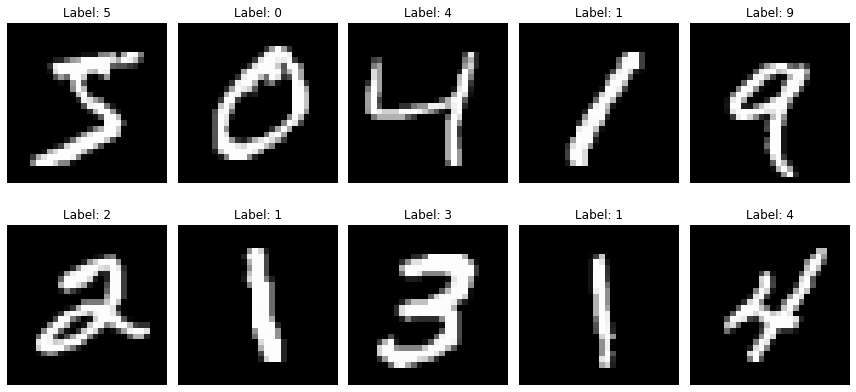

In [5]:
import matplotlib.pyplot as plt

# Display sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {y_train[i]}')

plt.tight_layout()
plt.show()

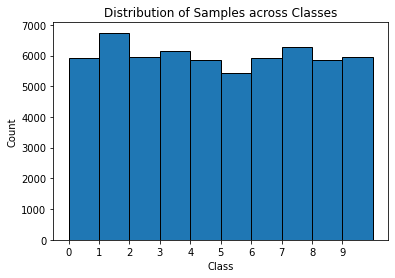

In [6]:
plt.hist(y_train, bins=range(11), edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Samples across Classes')
plt.xticks(range(10))
plt.show()

The uniformity of the bar heights suggests that the data does not have significant variability across the different categories. This could indicate:

Balanced Data: This suggests that the values are quite consistent across different class of 0-9 images.
Even Distribution: There might be an almost even distribution of resources, opportunities, or occurrences across the classes represented.

In [7]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

#### Model Building

In [14]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Ensure input_shape matches (784,)
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.8699 - loss: 0.4392 - val_accuracy: 0.9586 - val_loss: 0.1244
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9675 - loss: 0.1036 - val_accuracy: 0.9713 - val_loss: 0.0861
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9784 - loss: 0.0675 - val_accuracy: 0.9737 - val_loss: 0.0832
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9835 - loss: 0.0500 - val_accuracy: 0.9745 - val_loss: 0.0809
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9871 - loss: 0.0395 - val_accuracy: 0.9769 - val_loss: 0.0756
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9883 - loss: 0.0341 - val_accuracy: 0.9764 - val_loss: 0.0786
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9920 - loss: 0.0258 - val_accuracy: 0.9749 - val_loss: 0.0915
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9925 - loss: 0.02

I have used a simple architecture with two hidden layers. The first hidden layer has 128 units and uses the ReLU activation function, while the second hidden layer has 64 units and also uses the ReLU activation function. The output layer has 10 units for the 10 classes in the Fashion MNIST dataset and uses the softmax activation function.

I have compiled the model using the Adam optimizer and the sparse categorical crossentropy loss function, which is suitable for multi-class classification problems. During training, I have specified the number of epochs as 10 and used the validation data for evaluating the model's performance.

#### Model Evaluation

In [15]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_test, y_test)

# Calculate the training loss and accuracy
train_loss, train_accuracy = model.evaluate(X_train, y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9725 - loss: 0.1078
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9940 - loss: 0.0168


The provided outputs are performance metrics from training and evaluating a model on the MNIST dataset. The first output indicates evaluation on 313 test samples with an accuracy of 97.25% and a loss of 0.1078, showing strong performance in correctly classifying handwritten digits. The second output signifies training over 1875 batches with an accuracy of 99.40% and a loss of 0.0168, demonstrating excellent training convergence and high accuracy on the training data. These results indicate that the model has effectively learned to classify MNIST digits with high accuracy, achieving robust performance on both training and test datasets.

In [16]:
# Check if the history object has recorded any metrics
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


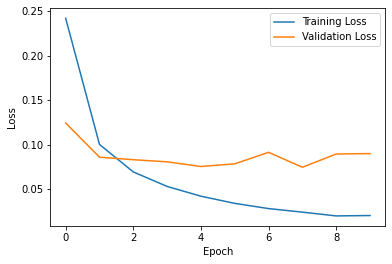

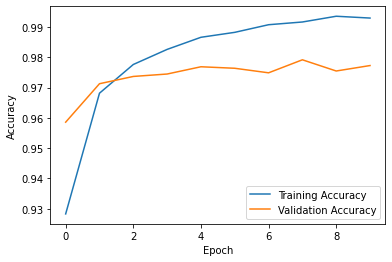

Training Loss: 0.0171
Training Accuracy: 0.9941
Validation Loss: 0.0901
Validation Accuracy: 0.9773


In [18]:
# Visualize the losses and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f'Training Loss: {train_loss:.4f}')
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

The model shows good learning behavior on the training data, with both the loss decreasing and accuracy increasing steadily.
The validation curves indicate some overfitting, as evidenced by the increase in validation loss and fluctuations in validation accuracy after certain epochs.
Overall, while the model performs well on the training data, its performance on the validation data suggests room for improvement, possibly through techniques such as regularization, dropout, or early stopping to mitigate overfitting.

#### Model Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


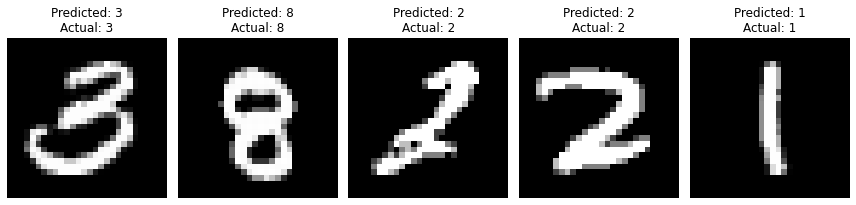

In [19]:
import numpy as np

# Make predictions on the test set
predictions = model.predict(X_test)

# Select a few random samples
sample_indices = np.random.choice(range(len(X_test)), size=5, replace=False)

# Display the sample predictions and images
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i, ax in enumerate(axes):
    # Get the predicted class label
    predicted_class = np.argmax(predictions[sample_indices[i]])
    
    # Display the image
    ax.imshow(X_test[sample_indices[i]].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Predicted: {predicted_class}\nActual: {y_test[sample_indices[i]]}')

plt.tight_layout()
plt.show()

Each digit has been analyzed based on its distinct features: the first digit resembles '3' with a clear top loop and defined bottom curve; the second digit is identified as '8' due to its closed, overlapping loops; the third and fourth digits are both '2', characterized by a curved top line and slanted base; and the fifth digit is '1', distinguished by its straight vertical line. These observations highlight typical representations of MNIST digits, commonly used for training and evaluating models in handwritten digit recognition tasks, where clear and characteristic shapes aid in accurate classification.